# Инструкция:

Код программы приведен здесь. Чтобы все работало, необходимо сделать run для всех ячеек по порядку, там, где потредуется ввод, ввести сначала полностью регулярку, затем букву. Программа выведет ответ или сообщение об ошибке, если ввод некорректный. Отрисовка графа в конце программы.

In [14]:
from collections import defaultdict
from graphviz import Digraph

Подробное описание построения автомата есть в отдельном файле.
Функции взятия переходов, стартовой и терминальной вершины нужны для отрисовки графа. Именно поэтому основная часть программы, которая выполняет запуск, расположена в отдельной ящейке jyputer notebook. 

In [15]:
class Automat:
    max_k = 0 # искомое k
    const_max_k = 1000000000
    color = [] # для dfs
    ways = defaultdict(dict) # переходы
    start = 0 # итоговое стартовое
    end = 0 # итоговое конечное
    vertexes = [] # вершины
    error = 0 # корректность ввода
    parent = defaultdict(list) 
    # откуда, по какому символу
     
    def get_ways(self):
        return self.ways
    
    def get_start(self):
        return str(self.start)
    
    def get_end(self):
        return str(self.end)
    
    def is_correct_reguler(self, regex):
        stack_size = 0
        for symbol in regex:
            if symbol == '1' or symbol == 'a' or symbol == 'b' or symbol == 'c':
                stack_size += 1
            elif symbol == '*':
                if stack_size == 0:
                    self.error = 1
            elif symbol == '+' or symbol == '.':
                if stack_size < 2:
                    self.error = 1
                stack_size -= 1
            else:
                self.error = 1
            if self.error:
                return False
        return stack_size == 1
 
    def __init__(self, regex):
        # посроение автомата
        if not Automat.is_correct_reguler(self, regex):
            print("Wrong input format")
        else:
            number_vertex = 0
            stack = []
            for symbol in regex:
                if symbol == 'a' or symbol == 'b' or symbol == 'c' or symbol == '1':
                    self.vertexes.append(number_vertex) 
                    # стартовое состояние
                    self.ways[number_vertex][symbol] = []
                    self.ways[number_vertex][symbol].append(number_vertex + 1)
                    number_vertex += 1
                    self.vertexes.append(number_vertex) 
                    # конечноe состояние
                    stack.append([number_vertex - 1, number_vertex])
                    number_vertex += 1
                elif symbol == '.':
                    second = stack.pop()
                    first = stack.pop()
                    self.ways[first[1]] = (self.ways.pop(second[0]))
                    stack.append([first[0], second[1]])
                elif symbol == '+':
                    second = stack.pop()
                    first = stack.pop()
                    self.vertexes.append(number_vertex)  
                    # сделали новую стартовую
                    self.ways[number_vertex][1] = []
                    self.ways[number_vertex][1].append(first[0])
                    self.ways[number_vertex][1].append(second[0])
                    number_vertex += 1
                    self.vertexes.append(number_vertex) 
                    # сделали новую завершающую
                    self.ways[first[1]][1] = []
                    self.ways[second[1]][1] = []
                    self.ways[first[1]][1].append(number_vertex)
                    self.ways[second[1]][1].append(number_vertex)
                    stack.append([number_vertex - 1, number_vertex])
                    number_vertex += 1
                elif symbol == '*':
                    element = stack.pop()
                    self.vertexes.append(number_vertex) 
                    # новое начальное
                    self.ways[number_vertex][1] = []
                    self.ways[number_vertex][1].append(element[0])
                    try:
                        self.ways[element[1]][1].append(element[0])
                        # зациклили
                    except:
                        self.ways[element[1]][1] = []
                        self.ways[element[1]][1].append(element[0])
                    number_vertex += 1
                    self.vertexes.append(number_vertex)
                    # новое завершающее
                    self.ways[element[1]][1].append(number_vertex)
                    self.ways[number_vertex - 1][1].append(number_vertex)
                    stack.append([number_vertex - 1, number_vertex])
                    number_vertex += 1
            started_end_pair = stack.pop()
            self.start = started_end_pair[0]
            self.end = started_end_pair[1]
 
    def is_x_in_cycle(self, vertex, x, cycle_fin):
        # пришли в цикл. Проверим, есть и там хоть 1 x
        current = vertex
        if (self.ways[current].get(x) != None and 
            self.ways[current].get(x).count(cycle_fin) > 0) or \
                (self.ways[current].get(1) != None and
                 self.ways[current].get(1).count(cycle_fin) > 0):
            return True
 
        while self.parent[current][1] != x and current != cycle_fin:
            current = self.parent[current][0]
        if current != cycle_fin:
            return True
        elif self.parent[current][1] == x:
            return True
        else:
            return False
 
    def dfs(self, vertex, x, depth, vertex_from, letter):
        if (self.max_k == self.const_max_k):
            return
        if (depth > self.max_k):
            self.max_k = depth
        self.parent[vertex].append(vertex_from)
        self.parent[vertex].append(letter)
        self.color[vertex] = 1  # серый
        for symbol in self.ways[vertex]:
            if symbol == x or symbol == 1:
                for child in self.ways[vertex][symbol]:
                    if self.color[child] == 0:
                        if symbol == x:
                            self.dfs(child, x, depth + 1, vertex, symbol)
                        else:
                            self.dfs(child, x, depth, vertex, symbol)
                    elif self.color[child] == 1:
                        if self.is_x_in_cycle(vertex, x, child):
                            self.max_k = self.const_max_k
                            return
 
                    self.color[child] = 2
 
    def find_max_k(self, x):
        if self.error == 0:
            self.color = [0 for i in range(len(self.vertexes))]
            self.dfs(self.start, x, 0, -1, 1)
            if self.max_k == self.const_max_k:
                print("INF")
            else:
                print(self.max_k)
 

In [16]:
regex = str(input())
x = str(input())
if (x != 'a' and x != 'b' and x != 'c'):
        print("Wrong input format")
else:
    auto = Automat(regex)
    auto.find_max_k(x)

ab+c.aba.*.bac.+.+*
a
2


Подготовка к отрисовке

In [17]:
ways = auto.get_ways()
start = auto.get_start()
end = auto.get_end()
g = Digraph(comment ='Automat')
g.graph_attr['rankdir']='LR'
g.node_attr.update(color='lightblue2', style='filled')
g.edge_attr.update(arrowhead='vee', arrowsize ='1')
for vertex in ways:
    for symbol in ways[vertex]:
        for child in ways[vertex][symbol]:
            g.edge(str(vertex), str(child), label=str(symbol), )

Отметим стартовую и терминальную вершины.

In [18]:
g.node(start,'start', shape='Mdiamond')
g.node( end,'end', shape='Msquare')


Для отрисовки графа просто пишем g

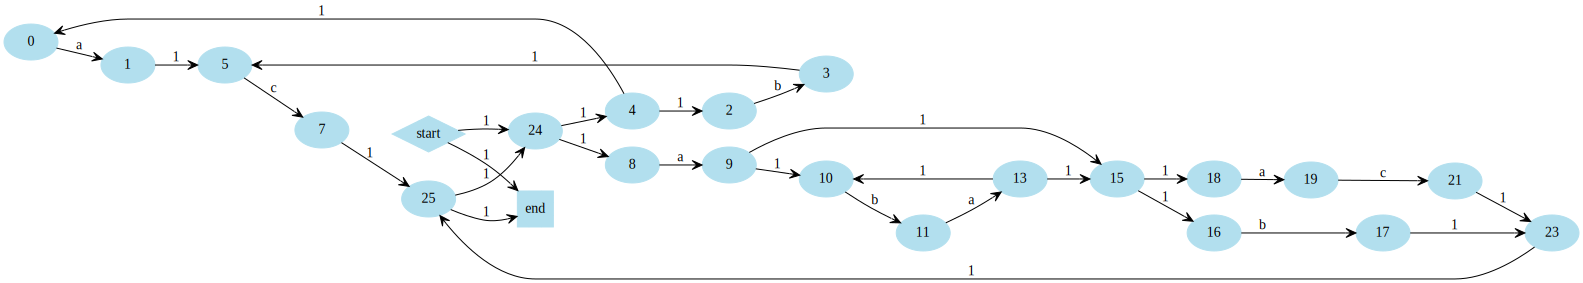

In [19]:
g

# Тесты лектора:
- ab+c.aba.\*.bac.+.+\*
- a
- 2
- 
- acb..bab.c.\*.ab.ba.+.+\*a.
- c
- 0

Мои тесты:
 - некорректный ввод: 
 - - hello
 - - aa.b.\*+ 
 - INF:
 - - aa.\* ___ a ___  INF
 - - bc+a+\* ___  a  ___ INF
 - Обычные тесты:
 - - aa.c.aa.a.b.+aa.a.a.a.c.+\*  ___ a ___ 5
 - - aa.c.aa.a.b.+aa.a.a.a.c.+\* ___  b ___ 0
 - - bc.a+\* ___  b ___ 1

![Image of test](https://raw.githubusercontent.com/Aquarium42/Formal_Language/master/photo5431808735564638653.jpg)

![Image of test](https://raw.githubusercontent.com/Aquarium42/Formal_Language/master/photo5431808735564638654.jpg)